Gather relevant data from various sources, including real estate databases, government records, online listings, and other public or private sources. <br>
Clean and prepare the collected data by handling missing values, removing outliers, and converting categorical variables into numerical representations.<br>
Create new features or transform existing ones to capture important information that can influence real estate prices.<br >
Explore and visualize the data to gain insights into its distribution, correlations, and patterns.
Choose appropriate machine learning algorithms or predictive models for the task.<br>
Train the selected model on the training data, optimizing its parameters to make accurate predictions.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_estate_data = pd.read_csv('Real_Estate.csv')

In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [6]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [8]:
sns.set_style('whitegrid')

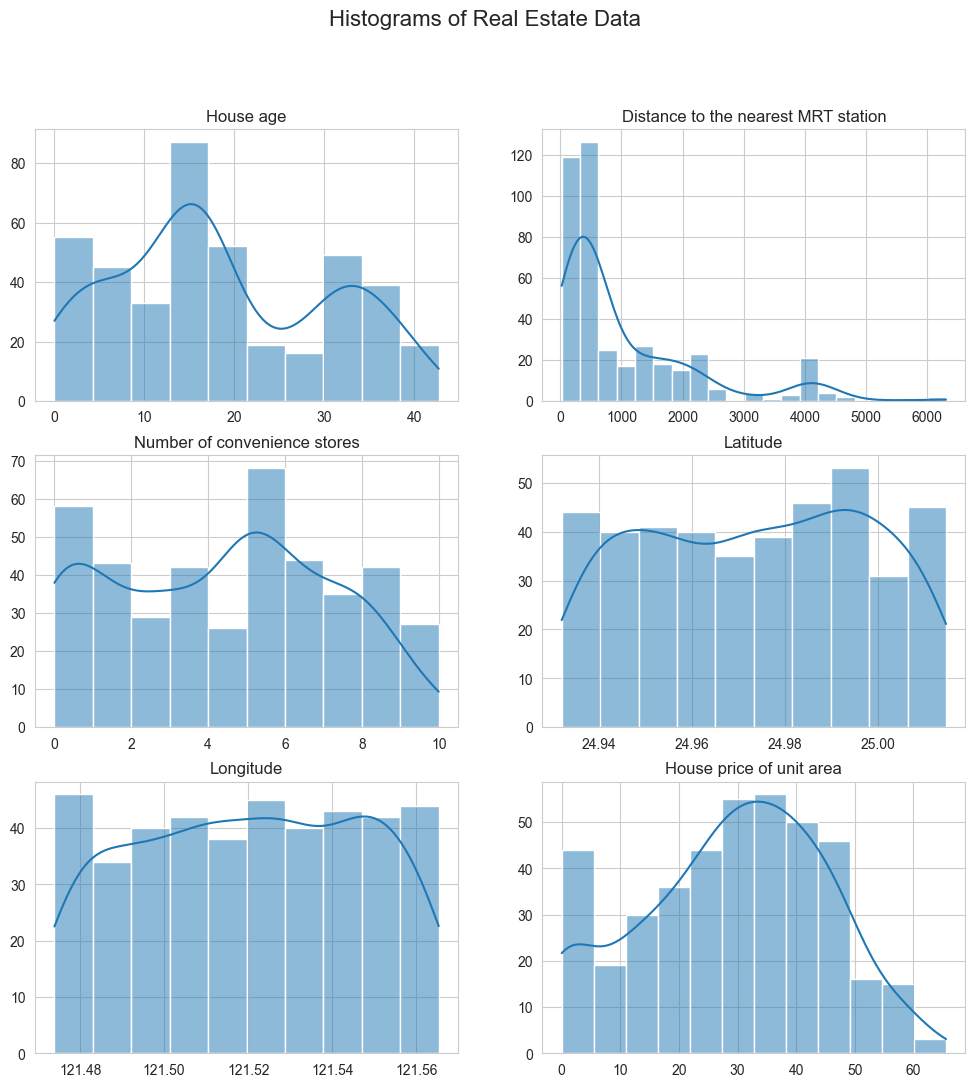

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax= axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Sự phân bổ khá đồng đều và tăng nhẹ ở sl bds mới (10-20 năm tuổi)<br>
HHầu hết sl bds nằm gần ga mrt (<1000), có 1 số lượng nhỏHở xa ga.<br>
SLSL store phân bổ khá đồng đều, các đỉnh đáng chú ý ở các số đếm cụ thể, như 1, 5. <br>
Cả hai đều cho thấy sự phân bố tương đối tập trung, cho thấy các bất động sản này nằm trong một khu vực địa lý nhất định.<br>
SSự tập trung của các bất động sản trong phạm vi giá thấp và ít bất động sản hơn khi giá tăng.

Tạo biểu đồ phân tán để khám phá mối quan hệ giữa các biến này và giá nhà.

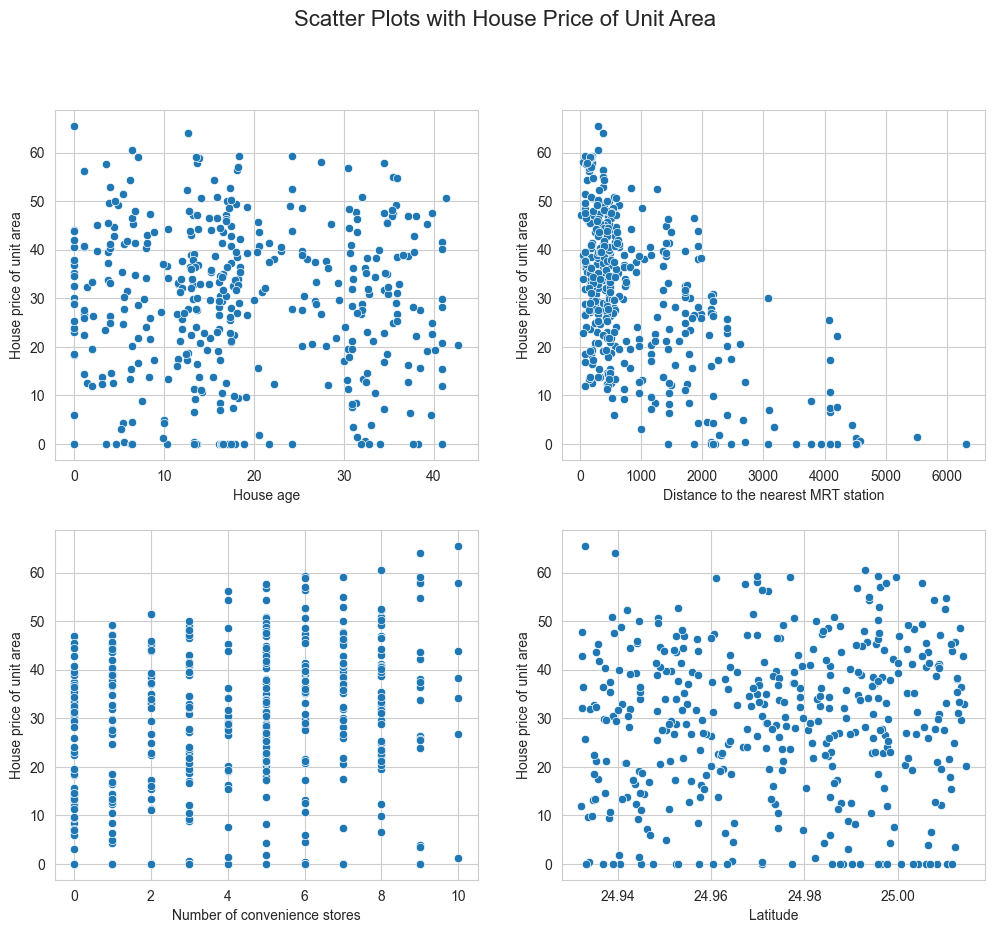

In [24]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.show()

Tuổi nhà so với giá nhà: Có vẻ như không có mối quan hệ tuyến tính chặt chẽ giữa tuổi nhà và giá nhà. Tuy nhiên, có vẻ như những ngôi nhà rất mới và rất cũ có thể có giá cao hơn.<br>
Khoảng cách đến trạm MRT gần nhất so với giá nhà: Có một xu hướng rõ ràng cho thấy khi khoảng cách đến trạm MRT gần nhất tăng lên, giá nhà có xu hướng giảm. Điều này cho thấy mối quan hệ tiêu cực mạnh mẽ giữa hai biến này.<br>
Số lượng cửa hàng tiện lợi so với giá nhà: Có vẻ như có mối quan hệ tích cực giữa số lượng cửa hàng tiện lợi và giá nhà. Những ngôi nhà có nhiều cửa hàng tiện lợi ở gần thường có giá cao hơn.<br>
Vĩ độ so với Giá nhà: Mặc dù không phải là mối quan hệ tuyến tính mạnh, nhưng có vẻ như có một mô hình mà một số vĩ độ nhất định tương ứng với giá nhà cao hơn hoặc thấp hơn. Điều này có thể chỉ ra rằng các khu phố cụ thể được mong muốn hơn.


In [30]:
real_estate_data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


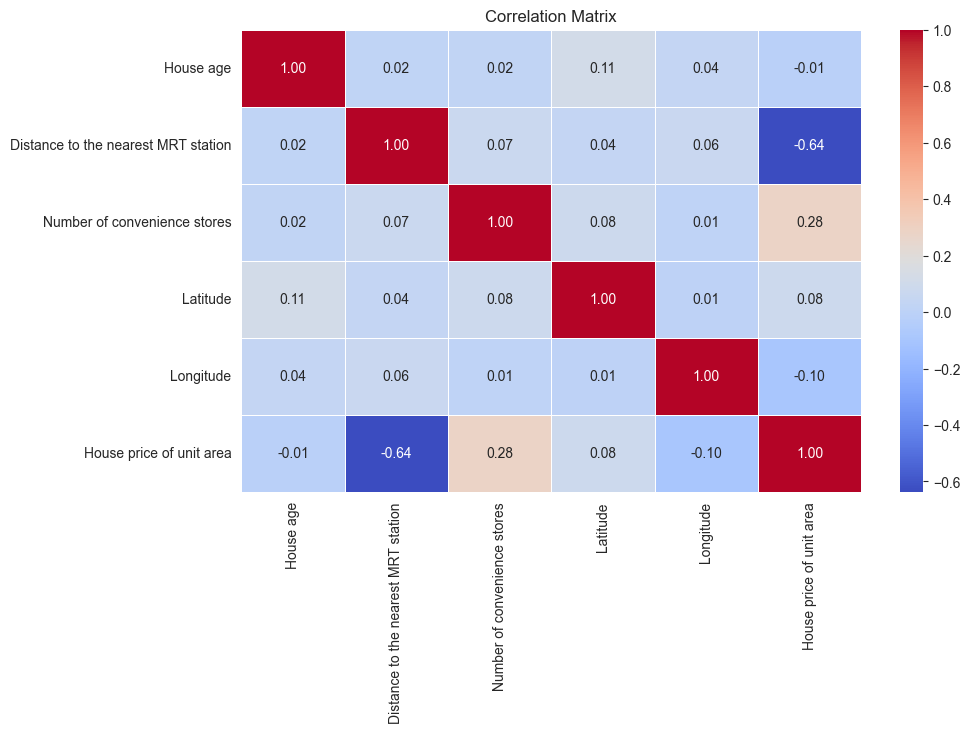

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [ ]:
data = real_estate_data[['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']]

correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

Điều này cho thấy mối tương quan âm rất yếu với giá nhà (-0,012), ngụ ý rằng tuổi tác không phải là yếu tố dự báo mạnh về giá trong tập dữ liệu này.<br>
Có mối tương quan âm mạnh với giá nhà (-0,637). Điều này cho thấy các bất động sản gần ga tàu điện ngầm MRT có xu hướng có giá cao hơn, đây là yếu tố quan trọng trong định giá bất động sản.<br>
Hiển thị mối tương quan tích cực vừa phải với giá nhà (0,281). Nhiều cửa hàng tiện lợi hơn trong vùng lân cận có vẻ ảnh hưởng tích cực đến giá bất động sản <br>
Cả hai đều cho thấy mối tương quan yếu với giá nhà. Vĩ độ có mối tương quan dương nhẹ (0,081), trong khi kinh độ có mối tương quan âm nhẹ (-0,099).

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

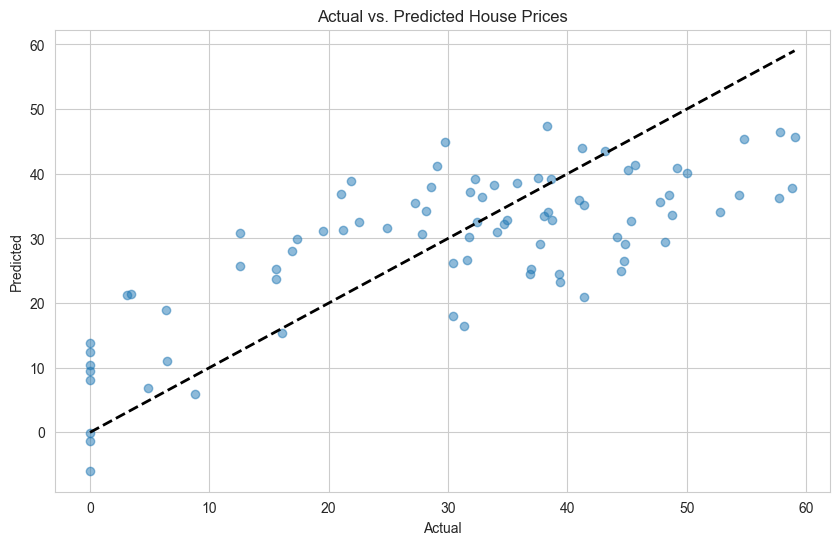

In [34]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()